In [ ]:
import zipfile
import os

# Define paths
zip_file_path = '/GaitDatasetA-silh.zip'  # Replace with your zip file path
extraction_folder = '/path/to/extracted/folder/'  # Replace with your extraction path

# Unzip the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_folder)

# Check the extracted folders
print("Extracted folders:", os.listdir(extraction_folder))


Extracted folders: ['GaitDatasetA-silh']


In [ ]:
import zipfile
import os

# Define paths
zip_file_path = '/GaitDatasetA-silh.zip'  # Replace with your zip file path
extraction_folder = '/path/to/extracted/folder/'  # Replace with your desired extraction path

# Unzip the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_folder)

# List the folders in the extracted directory
extracted_folders = os.listdir(extraction_folder)

# Get the full path of each folder
full_paths = [os.path.join(extraction_folder, folder) for folder in extracted_folders]

# Print the full paths of the folders
for path in full_paths:
    print("Folder path:", path)


Folder path: /path/to/extracted/folder/GaitDatasetA-silh


In [ ]:
dataset_dir = os.path.join(extraction_folder, 'GaitDatasetA-silh')  # Adjust based on folder structure

# Verify the folder
print("Dataset directory:", dataset_dir)
print("Contents:", os.listdir(dataset_dir))

Dataset directory: /path/to/extracted/folder/GaitDatasetA-silh
Contents: ['xch', 'zl', 'fyc', 'wq', 'lqf', 'zjg', 'yjf', 'wyc', 'rj', 'lsl', 'ml', 'wl', 'syj', 'zdx', 'nhz', 'hy', 'xxj', 'zc', 'zyf', 'ljg']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and normalization
data_gen = ImageDataGenerator(rescale=1.0 / 255.0, validation_split=0.2)

# Training and validation data loaders
train_data = data_gen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),  # Resize all images
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_data = data_gen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 15315 images belonging to 20 classes.
Found 3820 images belonging to 20 classes.


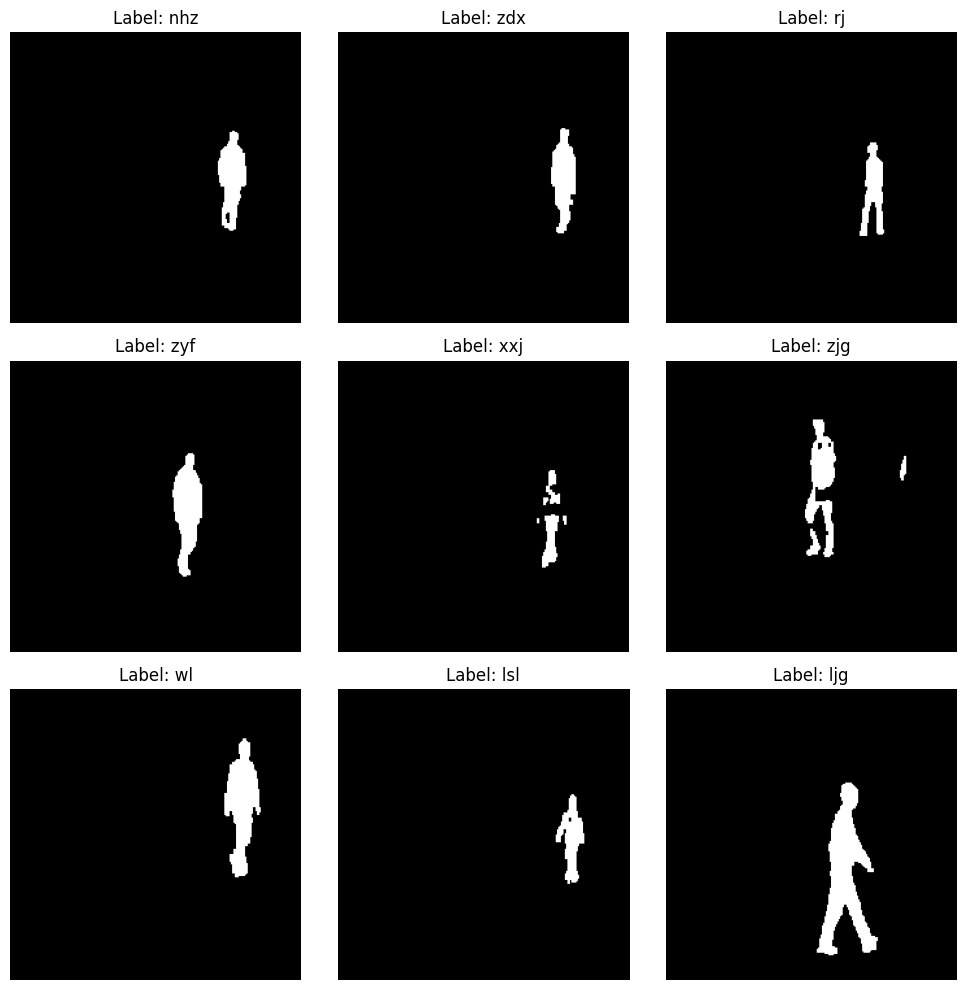

In [ ]:
import matplotlib.pyplot as plt

# Get a batch of images and labels
images, labels = next(train_data)

# Plot the first 9 images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.title(f"Label: {list(train_data.class_indices.keys())[labels[i].argmax()]}")
plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_data.class_indices), activation='softmax')  # Output layer with the number of classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Show the model summary
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 20)                  │           2,580 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,909,972 (91.21 MB)

 Trainable params: 23,909,972 (91.21 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=10  # Adjust the number of epochs as needed
)


Epoch 1/10
479/479 ━━━━━━━━━━━━━━━━━━━━ 38s 73ms/step - accuracy: 0.5889 - loss: 1.3598 - val_accuracy: 0.4963 - val_loss: 2.2234
Epoch 2/10
479/479 ━━━━━━━━━━━━━━━━━━━━ 30s 63ms/step - accuracy: 0.9438 - loss: 0.1803 - val_accuracy: 0.5202 - val_loss: 2.2419
Epoch 3/10
479/479 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.9693 - loss: 0.0856 - val_accuracy: 0.5079 - val_loss: 2.7301
Epoch 4/10
479/479 ━━━━━━━━━━━━━━━━━━━━ 30s 62ms/step - accuracy: 0.9805 - loss: 0.0626 - val_accuracy: 0.5147 - val_loss: 2.9096
Epoch 5/10
479/479 ━━━━━━━━━━━━━━━━━━━━ 41s 63ms/step - accuracy: 0.9863 - loss: 0.0410 - val_accuracy: 0.5275 - val_loss: 3.1989
Epoch 6/10
479/479 ━━━━━━━━━━━━━━━━━━━━ 41s 63ms/step - accuracy: 0.9884 - loss: 0.0419 - val_accuracy: 0.5327 - val_loss: 3.0268
Epoch 7/10
479/479 ━━━━━━━━━━━━━━━━━━━━ 30s 62ms/step - accuracy: 0.9892 - loss: 0.0363 - val_accuracy: 0.5228 - val_loss: 3.3019
Epoch 8/10
479/479 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - accuracy: 0.9903 - loss: 0.0302 - 

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam

# Define input shape explicitly
input_shape = (224, 224, 3)
inputs = Input(shape=input_shape)

# Load VGG16 without the top layers, using explicit input tensor
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=inputs)

# Freeze base model layers to use pretrained weights
base_model.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Flatten feature maps
x = Dense(128, activation='relu')(x)  # Fully connected layer
x = Dropout(0.5)(x)  # Dropout for regularization
outputs = Dense(len(train_data.class_indices), activation='softmax')(x)  # Output layer

# Create the complete model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          65,6

 Total params: 14,782,932 (56.39 MB)

 Trainable params: 68,244 (266.58 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Train the model
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=10,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    validation_steps=validation_data.samples // validation_data.batch_size
)


Epoch 1/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 99s 176ms/step - accuracy: 0.0514 - loss: 3.1285 - val_accuracy: 0.0722 - val_loss: 2.9690
Epoch 2/10
  1/478 ━━━━━━━━━━━━━━━━━━━━ 55s 116ms/step - accuracy: 0.0938 - loss: 2.9851

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


478/478 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.0938 - loss: 2.9851 - val_accuracy: 0.0833 - val_loss: 2.9662
Epoch 3/10


KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Define the enhanced CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    GlobalAveragePooling2D(),
    Dense(128, activation='relu', kernel_initializer='he_normal'),
    Dropout(0.5),
    Dense(len(train_data.class_indices), activation='softmax')  # Output layer with the number of classes
])

# Compile the model with a smaller learning rate
model.compile(optimizer=Adam(learning_rate=0.0001),  # Lower learning rate for better convergence
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Show the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 20)                  │           2,580 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113,236 (442.33 KB)

 Trainable params: 112,788 (440.58 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Define the modified CNN model
model = Sequential([
    # First convolutional block
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),  # Additional Dropout for regularization

    # Second convolutional block
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Third convolutional block
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.5),

    # Replace Flatten with GlobalAveragePooling
    GlobalAveragePooling2D(),

    # Fully connected layers
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(len(train_data.class_indices), activation='softmax')  # Output layer
])

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Show the model summary
model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_6           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 20)                  │           2,580 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113,236 (442.33 KB)

 Trainable params: 112,788 (440.58 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Reduce learning rate when validation loss plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)

# Stop training early if validation loss doesn't improve
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Train the modified model
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=20,  # Start with more epochs; early stopping will prevent overfitting
    steps_per_epoch=train_data.samples // train_data.batch_size,
    validation_steps=validation_data.samples // validation_data.batch_size,
    callbacks=[reduce_lr, early_stopping]
)


Epoch 1/20
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.0686 - loss: 3.2446

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define the updated CNN model
model = Sequential([
    # First convolutional block
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),

    # Second convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Third convolutional block
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Fully connected layers
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.0001)),
    Dropout(0.5),
    Dense(len(train_data.class_indices), activation='softmax')  # Output layer
])

# Compile the model with a slightly higher learning rate
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Show the model summary
model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 20)                  │           2,580 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,171,540 (42.62 MB)

 Trainable params: 11,171,540 (42.62 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Callbacks for training
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=20,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    validation_steps=validation_data.samples // validation_data.batch_size,
    callbacks=[reduce_lr, early_stopping]
)


Epoch 1/20
478/478 ━━━━━━━━━━━━━━━━━━━━ 38s 73ms/step - accuracy: 0.5557 - loss: 1.5069 - val_accuracy: 0.5433 - val_loss: 1.7267 - learning_rate: 0.0010
Epoch 2/20
478/478 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8438 - loss: 0.5077 - val_accuracy: 0.5833 - val_loss: 0.9555 - learning_rate: 0.0010
Epoch 3/20
478/478 ━━━━━━━━━━━━━━━━━━━━ 32s 66ms/step - accuracy: 0.8920 - loss: 0.4544 - val_accuracy: 0.5223 - val_loss: 2.4055 - learning_rate: 0.0010
Epoch 4/20
478/478 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9062 - loss: 0.4373 - val_accuracy: 0.5000 - val_loss: 1.7478 - learning_rate: 0.0010
Epoch 5/20
477/478 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9373 - loss: 0.3728
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
478/478 ━━━━━━━━━━━━━━━━━━━━ 37s 69ms/step - accuracy: 0.9373 - loss: 0.3729 - val_accuracy: 0.5733 - val_loss: 1.9677 - learning_rate: 0.0010
Epoch 6/20
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 50us/step - accuracy: 0.9375 - loss: 0

In [ ]:
# Save the model to a file
model.save('best_gait_recognition_model.h5')
print("Model saved as 'best_gait_recognition_model.h5'")


Model saved as 'best_gait_recognition_model.h5'


In [ ]:
# Evaluate on validation data
val_loss, val_accuracy = model.evaluate(validation_data)
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Loss: {val_loss:.4f}")


120/120 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.5563 - loss: 1.6659
Validation Accuracy: 0.5469
Validation Loss: 1.7285


In [ ]:
# Evaluate on validation data
val_loss, val_accuracy = model.evaluate(validation_data)
print(f"Validation Accuracy at Best Epoch (92): {val_accuracy:.4f}")
print(f"Validation Loss at Best Epoch (92): {val_loss:.4f}")


120/120 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - accuracy: 0.5503 - loss: 1.7098
Validation Accuracy at Best Epoch (92): 0.5469
Validation Loss at Best Epoch (92): 1.7285


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions and true labels for validation set
val_data_batches = validation_data.__len__()
predictions = model.predict(validation_data, steps=val_data_batches, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_data.classes
class_labels = list(validation_data.class_indices.keys())

# Generate the report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


120/120 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step
              precision    recall  f1-score   support

         fyc       0.06      0.07      0.07       224
          hy       0.01      0.01      0.01       200
         ljg       0.04      0.06      0.05       209
         lqf       0.05      0.04      0.04       210
         lsl       0.05      0.02      0.03       201
          ml       0.05      0.04      0.04       193
         nhz       0.12      0.04      0.06       205
          rj       0.07      0.06      0.06       177
         syj       0.04      0.03      0.04       202
          wl       0.04      0.04      0.04       163
          wq       0.06      0.08      0.07       191
         wyc       0.06      0.07      0.07       183
         xch       0.07      0.10      0.08       166
         xxj       0.04      0.04      0.04       206
         yjf       0.04      0.06      0.05       187
          zc       0.07      0.08      0.08       168
         zdx       0.07      0.06      

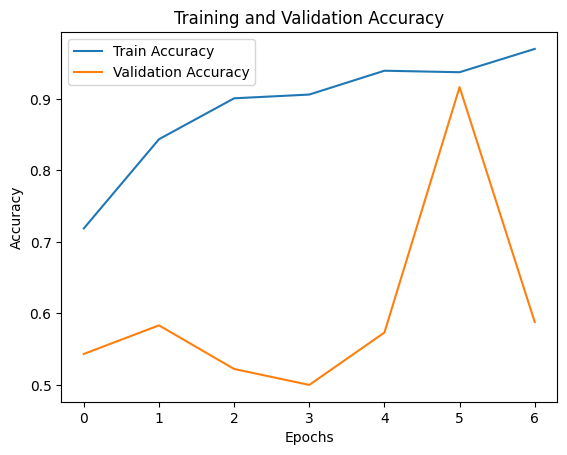

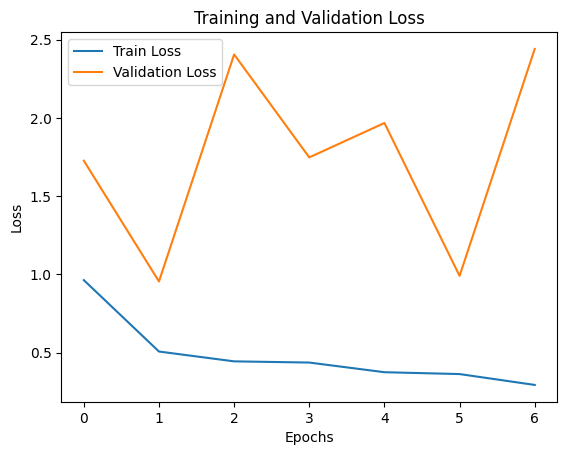

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
# Save classification report to a file
with open('classification_report.txt', 'w') as f:
    report = classification_report(true_classes, predicted_classes, target_names=class_labels)
    f.write(report)
    print("Classification report saved to 'classification_report.txt'")


Classification report saved to 'classification_report.txt'


In [ ]:
for images, labels in train_data:
    print(f"Image batch shape: {images.shape}")
    print(f"Label batch shape: {labels.shape}")
    break


Image batch shape: (32, 224, 224, 3)
Label batch shape: (32, 20)


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Input shape explicitly defined
input_shape = (224, 224, 3)

# Load ResNet50 base model with pre-trained weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(len(train_data.class_indices), activation='softmax')(x)

# Define the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,852,564 (90.99 MB)

 Trainable params: 264,852 (1.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# Define callbacks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Callback to stop training early if validation loss doesn't improve
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Callback to reduce the learning rate when performance plateaus
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1
)

# Callback to save the best model during training
# Callback to save the best model during training
checkpoint = ModelCheckpoint(
    'best_resnet_model.keras',  # Updated file extension to .keras
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Fit the model
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=20,
    callbacks=[early_stopping, reduce_lr, checkpoint]
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


384/479 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.0670 - loss: 3.0293

RuntimeError: pybind11::error_already_set: MISMATCH of original and normalized active exception types: ORIGINAL InternalError REPLACED BY KeyboardInterrupt: <EMPTY MESSAGE>

At:
  /usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/errors_impl.py(462): __init__
  /usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py(53): quick_execute
  /usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/context.py(1552): call_function
  /usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/atomic_function.py(251): call_flat
  /usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/atomic_function.py(216): call_preflattened
  /usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/concrete_function.py(1322): _call_flat
  /usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/tracing_compilation.py(139): call_function
  /usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/polymorphic_function.py(878): _call
  /usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/polymorphic_function.py(833): __call__
  /usr/local/lib/python3.10/dist-packages/tensorflow/python/util/traceback_utils.py(150): error_handler
  /usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py(318): fit
  /usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py(117): error_handler
  <ipython-input-12-a965b15ed144>(29): <cell line: 29>
  /usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py(3553): run_code
  /usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py(3473): run_ast_nodes
  /usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py(3257): run_cell_async
  /usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py(78): _pseudo_sync_runner
  /usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py(3030): _run_cell
  /usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py(2975): run_cell
  /usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py(539): run_cell
  /usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py(302): do_execute
  /usr/local/lib/python3.10/dist-packages/tornado/gen.py(234): wrapper
  /usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py(539): execute_request
  /usr/local/lib/python3.10/dist-packages/tornado/gen.py(234): wrapper
  /usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py(261): dispatch_shell
  /usr/local/lib/python3.10/dist-packages/tornado/gen.py(234): wrapper
  /usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py(361): process_one
  /usr/local/lib/python3.10/dist-packages/tornado/gen.py(786): run
  /usr/local/lib/python3.10/dist-packages/tornado/gen.py(825): inner
  /usr/local/lib/python3.10/dist-packages/tornado/ioloop.py(738): _run_callback
  /usr/local/lib/python3.10/dist-packages/tornado/ioloop.py(685): <lambda>
  /usr/lib/python3.10/asyncio/events.py(80): _run
  /usr/lib/python3.10/asyncio/base_events.py(1909): _run_once
  /usr/lib/python3.10/asyncio/base_events.py(603): run_forever
  /usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py(195): start
  /usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py(619): start
  /usr/local/lib/python3.10/dist-packages/traitlets/config/application.py(992): launch_instance
  /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py(37): <module>
  /usr/lib/python3.10/runpy.py(86): _run_code
  /usr/lib/python3.10/runpy.py(196): _run_module_as_main


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LSTM, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Define the updated model with LSTM
model = Sequential([
    # First convolutional block
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),

    # Second convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Third convolutional block
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flatten the output and reshape for LSTM
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.0001)),
    Dropout(0.5),

    # Reshape layer to make it compatible with LSTM
    Reshape((1, 128)),  # Reshape to (batch_size, time_steps, features) for LSTM

    # LSTM layer for capturing temporal dependencies
    LSTM(64, return_sequences=False),

    # Output layer
    Dense(len(train_data.class_indices), activation='softmax')  # len(train_data.class_indices gives number of classes
])

# Compile the model with a slightly higher learning rate
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.summary()
model.save('final_model.h5')

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 20)                  │           1,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,219,668 (42.80 MB)

 Trainable params: 11,219,668 (42.80 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define early stopping and model checkpointing callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Fit the model
history = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,  # Total steps per epoch
    epochs=20,  # Max number of epochs
    validation_data=validation_data,
    validation_steps=validation_data.samples // validation_data.batch_size,  # Total validation steps
    callbacks=[early_stopping, model_checkpoint]
)

# Evaluate the model
score = model.evaluate(validation_data, verbose=1)
print(f"Test Loss: {score[0]}")
print(f"Test Accuracy: {score[1]}")

# Save the final model
model.save('final_model.keras')


Epoch 1/20
478/478 ━━━━━━━━━━━━━━━━━━━━ 47s 96ms/step - accuracy: 0.8964 - loss: 0.5289 - val_accuracy: 0.5725 - val_loss: 1.6914
Epoch 2/20
478/478 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9375 - loss: 0.4882 - val_accuracy: 0.5833 - val_loss: 1.7122
Epoch 3/20
478/478 ━━━━━━━━━━━━━━━━━━━━ 39s 81ms/step - accuracy: 0.9317 - loss: 0.4347 - val_accuracy: 0.5583 - val_loss: 1.8338
Epoch 4/20
478/478 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9375 - loss: 0.4663 - val_accuracy: 0.5833 - val_loss: 1.3713
Epoch 5/20
478/478 ━━━━━━━━━━━━━━━━━━━━ 38s 80ms/step - accuracy: 0.9521 - loss: 0.3785 - val_accuracy: 0.5620 - val_loss: 1.8915
Epoch 6/20
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 76us/step - accuracy: 0.9062 - loss: 0.4632 - val_accuracy: 0.4167 - val_loss: 1.8139
Epoch 7/20
478/478 ━━━━━━━━━━━━━━━━━━━━ 38s 80ms/step - accuracy: 0.9637 - loss: 0.3322 - val_accuracy: 0.5641 - val_loss: 1.9795
Epoch 8/20
478/478 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9062 - loss: 0.3959 - val_a